## Import Libraries and Modules

we'll start by importing the most crucial libraries and modules that we'll need. That includes of course the data manipulation libraries, the data visualization libraries, and the four machine learning algorithms that we'll be comparing to each other


In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Load and Quick Exploration of Data

Here we start by loading our Dataset into a dataframe and looking at the first 5 rows, to get a look at the data and features we're dealing with. 

In [240]:
training = pd.read_csv('Data/train.csv')
testing = pd.read_csv('Data/test.csv')
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Here we will take a look at the shape of our dataset, the number of rows and columns, and columns that we'll be dealing with. And already by looking at the columns here, we can see that there are some columns that we can drop, because it won't impact our predictor feature (Survived), those are: PassengerId, Name

In [242]:


print(f'Shape of Dataset: {training.shape}')
print(f'Dataset Columns: {training.columns}')


Shape of Dataset: (891, 12)
Dataset Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


And before we continue we'll also be using the describe() method to get a statistical summary of the data, and the info() method to get a concise summary of the data, including the number of non-null values in each column to see if there are any missing values.

In [243]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [244]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Next thing next is to split up our dataset into numerical and categorical features, so that we can deal with them separately. 

In [245]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

## Data Cleaning

First thing we will be doing is renaming some of the columns, to give us more clarity over what each column is and what it tells us

In [246]:
training.rename(columns={
        'Pclass': 'Class',
        'SibSp': 'NumSiblingsSpouse',
        'Parch': 'NumAssociatedFamily',
    }, inplace=True)

testing.rename(columns={
        'Pclass': 'Class',
        'SibSp': 'NumSiblingsSpouse',
        'Parch': 'NumAssociatedFamily',
    }, inplace=True)




We will also be changing the values of Pclass from 1st, 2nd and 3rd into first, second and third, just to make it easier to read and understand, also easier for visualizations

In [247]:
training['Class'] = training['Class'].replace({1: 'first', 2: 'second', 3: 'third'})
testing['Class'] = testing['Class'].replace({1: 'first', 2: 'second', 3: 'third'})
training['Class'].head()

0    third
1    first
2    third
3    first
4    third
Name: Class, dtype: object

### Correcting Data Types

Pandas automatically loads the Survived column in as the data type int64, but in reality it should be of the bool value, since it's binary, so we'll be changing that.


In [248]:
training['Survived'] = training['Survived'].astype('bool')
training.dtypes

PassengerId              int64
Survived                  bool
Class                   object
Name                    object
Sex                     object
Age                    float64
NumSiblingsSpouse        int64
NumAssociatedFamily      int64
Ticket                  object
Fare                   float64
Cabin                   object
Embarked                object
dtype: object

## Exploratory Data Analysis

### Data Visualizations

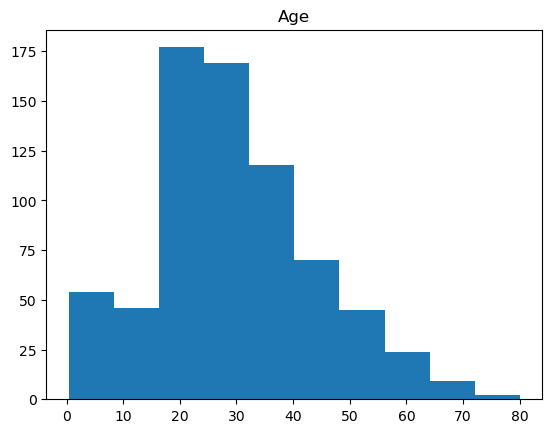

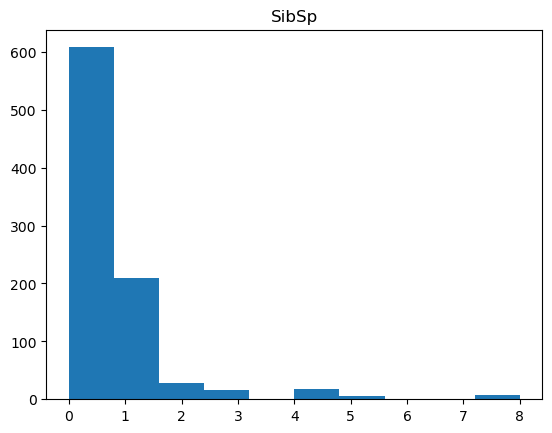

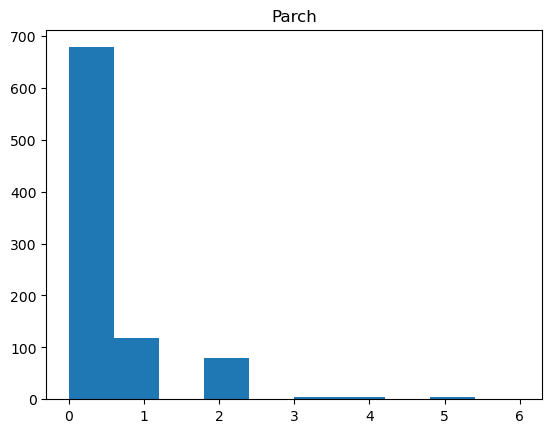

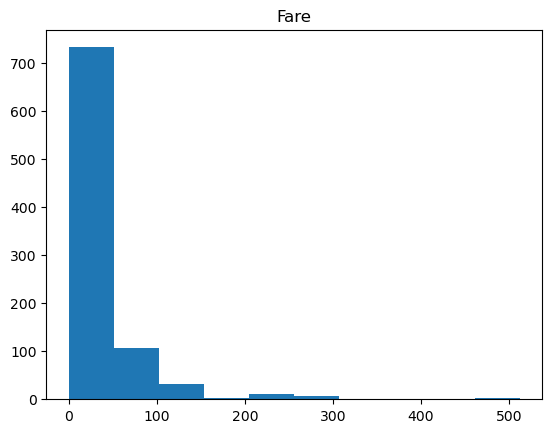

In [249]:
for col in df_num.columns:
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()

Here we see that most of our histplots are scattered and it's pretty much only age that is normally distributed, that means that we might consider normalizing the data later on

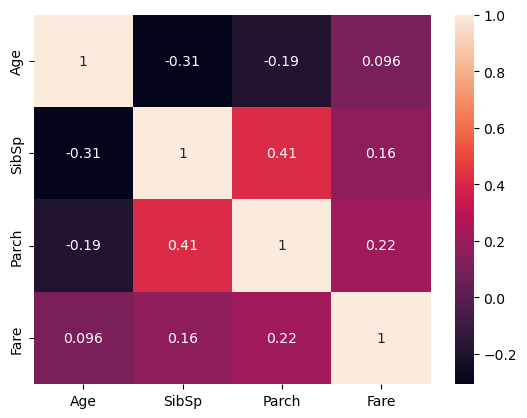

<Figure size 640x480 with 0 Axes>

In [250]:
corr = df_num.corr()
sns.heatmap(corr, annot=True)
plt.show()
plt.clf()

In this heatmap we can see that parch and sibSp have a fairly high correlation (0.41) which makes sense since parents are more likely to travel with their multiple children and spouses 

In [251]:
pd.pivot_table(training, index='Survived', values=['Age', 'NumSiblingsSpouse', 'NumAssociatedFamily', 'Fare'])

,Age,Fare,NumAssociatedFamily,NumSiblingsSpouse
Survived,,,,
False,30.626179,22.117887,0.329690,0.553734
True,28.343690,48.395408,0.464912,0.473684


1. This pivot table reveals some interesting insights, we see that the average age of survivors is 28.5, so young people tend to survive more
2. The Average Fare for survivors is 48.4 so people who paid more for their tickets tend to survive more.
3. If you had parents onboard, you had a higher chance of survival, which might be because the parents were more likely to save their children first
4. And if you have siblings or spouses onboard, you had a lower chance of survival, which might be because you were more likely to save your children first, and not your siblings or spouses


And now we can do the same thing for the categorical features, and see if we can find any interesting insights there

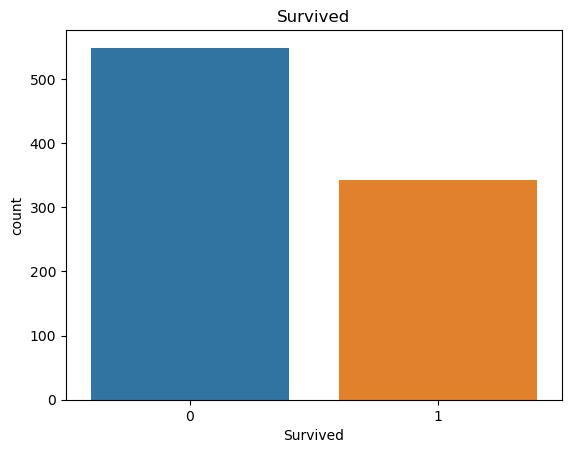

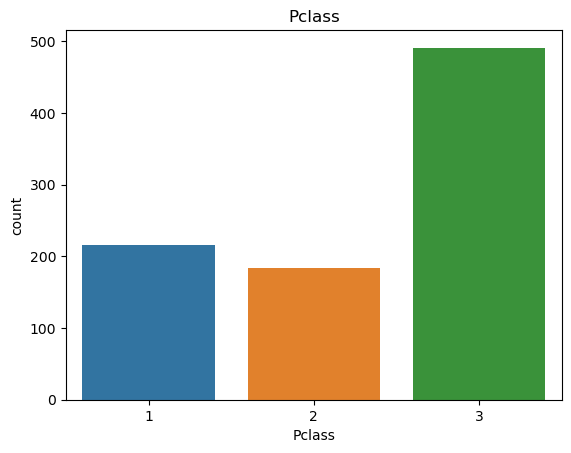

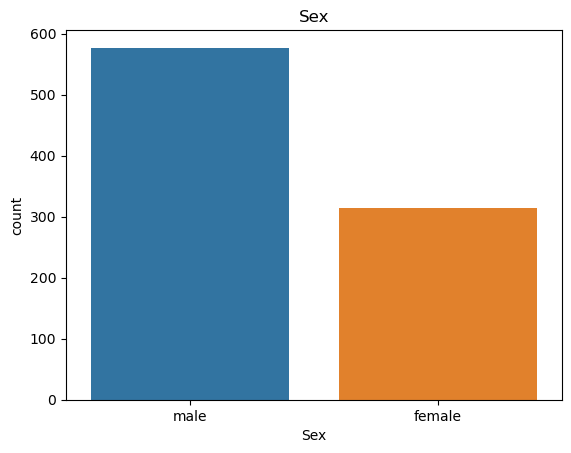

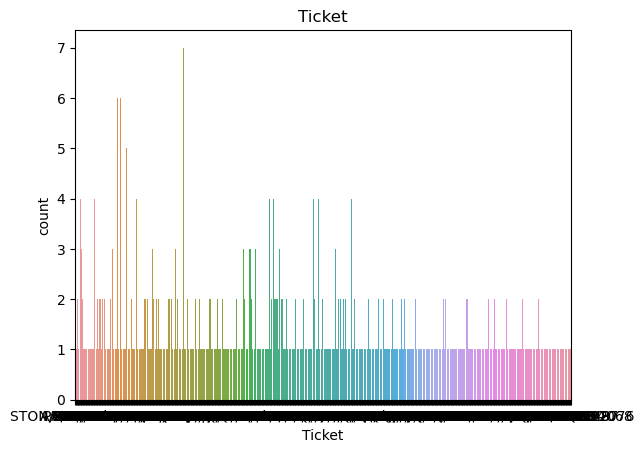

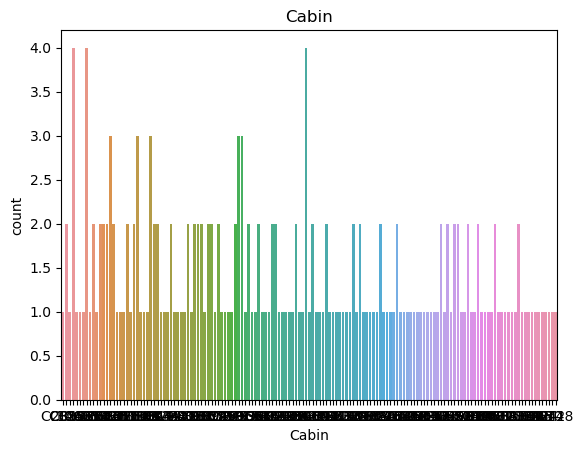

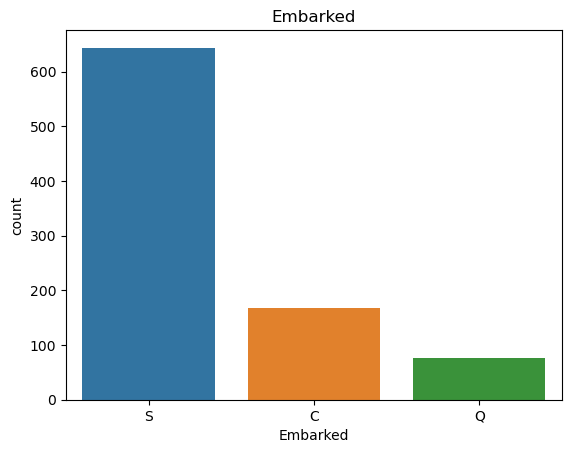

In [252]:
for col in df_cat.columns:
    sns.countplot(data=df_cat, x=col)
    plt.title(col)
    plt.show()
    

In these barplots the first thing we see is that our ticket and cabin data looks very messy, so we might have to feature engineer them. But from the other countplots, we can extract a few different things:

1. Most of the people died on the titanic, only about 300 survived

2. A bigger majority of the passengers are males, almost double the amount of females!

3. Most people embarked from Southampton

In [253]:
pd.pivot_table(training, index = 'Survived', columns = 'Class',
                     values = 'PassengerId' ,aggfunc ='count')

Class,first,second,third
Survived,,,
False,80,97,372
True,136,87,119


Here we can see that there were more people from 1st class that survived than any one else. 3rd class also had a lot of survivors but there were even more deaths

In [254]:
pd.pivot_table(training, index = 'Survived', columns = 'Sex',
                     values = 'PassengerId' ,aggfunc ='count')

Sex,female,male
Survived,,
False,81,468
True,233,109


Here we clearly see that sex has a huge impact on our Survived Predictor Variable. There were more males onboard but still there are more than double female survivors than male survivors

In [255]:
pd.pivot_table(training, index = 'Survived', columns = 'Embarked',
                     values = 'PassengerId' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
False,75,47,427
True,93,30,217


Here we see that our embarked column isn't really that relevant, maybe if someone were more likely to survive if they embarked from Southampton

## Data Preprocessing for Model

In this section we will be preparing our model for deployment, the things that we will be doing is:
1. Drop Null Values from Embarked Column
2. Include only relevant data and columns
3. Normalize our fare column
4. Impute Data in our Age column
5. Categorically transform our data with a transformer (OHE, Ordinal Encoding)
6. Using a Standard Scaler to scale the data, so all columns are on the same scale.

### Drop Null Values from Embarked Column

In [256]:
training.dropna(subset=['Embarked'], inplace=True)
print(f'Null values in training Embarked {training.Embarked.isnull().sum()}')
testing.dropna(subset=['Embarked'], inplace=True)
print(f'Null values in testing Embarked {testing.Embarked.isnull().sum()}')

Null values in training Embarked 0
Null values in testing Embarked 0


### Include only relevant data and columns

Now we will be testing our columns, and see which ones are actually relevant, and which ones would be safe to drop. I already have a hypothesis of which ones might be safe to drop, which are: Cabin (since only 202 are non null vals), Ticket, Embarked, Name, PassengerId

We already know that we will have to drop the cabin column it's filled with null values, and it's practically impossible to impute, we already saw in our pivot table that the embarked column have no impact on our predictor variable Survived, we also know that PassengerId and Name doesn't have any impact on our Survived predictor variable, so all of these should be safe to drop.

In [257]:
training = training.drop(columns=['Name', 'PassengerId', 'Embarked', 'Cabin', 'Ticket'],axis=1)
testing = testing.drop(columns=['Name', 'PassengerId', 'Embarked', 'Cabin', 'Ticket'],axis=1)

print(f'Training set columns after drop: {training.columns}')
print(f'Testing set columns after drop: {testing.columns}')


Training set columns after drop: Index(['Survived', 'Class', 'Sex', 'Age', 'NumSiblingsSpouse',
       'NumAssociatedFamily', 'Fare'],
      dtype='object')
Testing set columns after drop: Index(['Class', 'Sex', 'Age', 'NumSiblingsSpouse', 'NumAssociatedFamily',
       'Fare'],
      dtype='object')


### Normalizing Fare Column

Here we will be Normalizing the Fare column to be normally distributed, we will be using a log transformation to achieve this normal distribution. We will be testing out our algorithms with fare normally distributed but also without, and we'll be using cross-validation to check which one works the best.

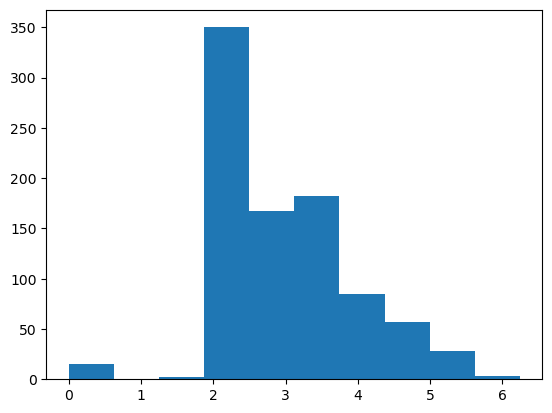

In [258]:

training_fare_normal = training.copy()
testing_fare_normal = testing.copy()
training_fare_normal['Fare'] = np.log1p(training_fare_normal['Fare'])
testing_fare_normal['Fare'] = np.log1p(testing_fare_normal['Fare'])

# check normality
plt.hist(training_fare_normal['Fare'])
plt.show()


### Impute Data with Central Tendencies in Age and Fare column

#### Age

Our Age column has quite a few missing values, which means we will need to impute this data. But first we will take a look at the missing rows to make sure that there is no pattern in our missing Age data, because that would mean that it's not MCAR.

In [259]:

missing_age_data = training[training['Age'].isna()]
missing_age_data.head(10)

,Survived,Class,Sex,Age,NumSiblingsSpouse,NumAssociatedFamily,Fare
5,False,third,male,NaN,0,0,8.4583
17,True,second,male,NaN,0,0,13.0000
19,True,third,female,NaN,0,0,7.2250
26,False,third,male,NaN,0,0,7.2250
28,True,third,female,NaN,0,0,7.8792
29,False,third,male,NaN,0,0,7.8958
31,True,first,female,NaN,1,0,146.5208
32,True,third,female,NaN,0,0,7.7500
36,True,third,male,NaN,0,0,7.2292
42,False,third,male,NaN,0,0,7.8958


We see that there is no pattern in our missing data, and therefore it would be safe for us to assume that it's MCAR, and we can now impute it with a central tendency. We will be using the mean age

In [260]:
mean_age = np.mean(training['Age'])
training['Age'] = training['Age'].fillna(float(mean_age))

mean_age = np.mean(testing['Age'])
testing['Age'] = testing['Age'].fillna(float(mean_age))

print(f"NaN Values in Training Age Col: {training['Age'].isna().sum()}")
print(f"NaN Values in Testing Age Col: {testing['Age'].isna().sum()}")


NaN Values in Training Age Col: 0
NaN Values in Testing Age Col: 0


#### Fare

The fare column in our testing set has only one NaN value and therefore it is fair to assume that it's MCAR, and therefore we can impute it with the central tendency Mean again

In [261]:
mean_fare = np.mean(testing['Fare'])
testing['Fare'] = testing['Fare'].fillna(float(mean_fare))
print(f"NaN Values in Testing Fare Col: {testing['Fare'].isna().sum()}")


NaN Values in Testing Fare Col: 0


### Transforming Categorical Variables

We will need to transform some categorical variables before we can feed our data into our model, we will be transforming our sex column into a binary format, so 0 = male and 1 = female, because there's only two values for sex in our dataset. And the last categorical class we will be transforming using One-hot-encoding (OHE)

#### Transforming Sex into Binary Format

In [262]:
training['Sex'] = training['Sex'].replace({'male': 0, 'female': 1})
testing['Sex'] = testing['Sex'].replace({'male': 0, 'female': 1})
print(training['Sex'].head())
print(testing['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64
0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64


#### One Hot Encoding Class Column

In [263]:
train_dummies = pd.get_dummies(training['Class'])
test_dummies = pd.get_dummies(testing['Class'])

training = pd.concat([training, train_dummies], axis=1)
testing = pd.concat([testing, test_dummies], axis=1)
training.drop(columns='Class', axis=1, inplace=True)
testing.drop(columns='Class', inplace=True)
training.head()


,Survived,Sex,Age,NumSiblingsSpouse,NumAssociatedFamily,Fare,first,second,third
0,False,0,22.0,1,0,7.2500,False,False,True
1,True,1,38.0,1,0,71.2833,True,False,False
2,True,1,26.0,0,0,7.9250,False,False,True
3,True,1,35.0,1,0,53.1000,True,False,False
4,False,0,35.0,0,0,8.0500,False,False,True


In [264]:
testing.head()

,Sex,Age,NumSiblingsSpouse,NumAssociatedFamily,Fare,first,second,third
0,0,34.5,0,0,7.8292,False,False,True
1,1,47.0,1,0,7.0000,False,False,True
2,0,62.0,0,0,9.6875,False,True,False
3,0,27.0,0,0,8.6625,False,False,True
4,1,22.0,1,1,12.2875,False,False,True


### Scale Data Using Standard Scaler

In [297]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

y = training['Survived']
X = training.drop(columns='Survived')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

col_names = ['Age', 'NumSiblingsSpouse', 'NumAssociatedFamily', 'Fare']
features = X_train_scaled[col_names]

scaler = StandardScaler().fit(features)
features = scaler.transform(features)

X_train_scaled[col_names] = features
X_train_scaled.head()

features = X_test[col_names]
features = scaler.transform(features)
X_test_scaled[col_names] = features
X_test_scaled.head()


,Sex,Age,NumSiblingsSpouse,NumAssociatedFamily,Fare,first,second,third
281,0,-0.141174,-0.474516,-0.475644,-0.492389,False,False,True
435,1,-1.208802,0.381780,2.010994,1.788823,True,False,False
39,1,-1.208802,0.381780,-0.475644,-0.423482,False,False,True
418,0,0.011345,-0.474516,-0.475644,-0.387716,False,True,False
585,1,-0.903766,-0.474516,2.010994,0.968044,True,False,False


## Model Testing

Now we're ready to build and test the four different models. Again the models that we're going to be testing are LogisticRegression, Support Vector Classifier, Decision Tree and K-Nearest-Neighbor. We will be measuring our model performance with cross-validation and using the mean cross-validation score.

### Logistic Regression

In [298]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81118881 0.81690141 0.79577465 0.78873239 0.73943662]
0.7904067763222693


### K-Nearest-Neighbour

In [299]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83216783 0.75352113 0.76760563 0.82394366 0.79577465]
0.7946025805180735


### Support Vector Classifier

In [302]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82517483 0.83098592 0.82394366 0.83802817 0.76760563]
0.817147641091303


### Decision Tree

In [305]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)
cv = cross_val_score(tree,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.6993007  0.81690141 0.77464789 0.8028169  0.73943662]
0.7666207032404216
